In [2]:
##Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
(55000, 784)


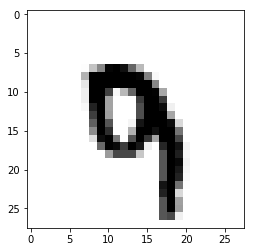

In [5]:
## Reading the data## Read 
df=input_data.read_data_sets("/tmp/data/",one_hot=True)
print(df.train.images.shape)
example=np.random.randint(0,55000)

im=df.train.images[example].reshape([28,28])
plt.imshow(im,cmap=plt.get_cmap('gray_r'))


In [6]:
###Neural Network Parameters###Neur 
### 28*28=784
img_dim=784
gen_dim=256
disc_dim=256
noise_dim=100

In [7]:
gen_inp= tf.placeholder(tf.float32,shape=[None,noise_dim])  #100
disc_input=tf.placeholder(tf.float32,shape=[None,img_dim])   #784

In [8]:
### Neural Network training parameters

batch_size=128
num_steps=80000
learning_rate=2e-4
display_step=20

In [21]:
def weight_init(shape):
    return tf.random_normal(shape=shape,stddev=1. / tf.sqrt(shape[0] / 2.))

In [28]:

###Model Architechture Weights###Mode 


W={"w1":tf.Variable(weight_init([noise_dim,gen_dim])),
   "w2": tf.Variable(weight_init([gen_dim,img_dim])),
   "w3": tf.Variable(weight_init([img_dim,disc_dim])), 
   "w4": tf.Variable(weight_init([disc_dim,1]))} 

b={"b1":tf.Variable(tf.zeros([gen_dim])),
   "b2":tf.Variable(tf.zeros([img_dim])),
   "b3":tf.Variable(tf.zeros([disc_dim])),
   "b4":tf.Variable(tf.zeros([1]))}


In [29]:
### Model Architechture 

##Generator 

def gen_fun(x):
    h1=tf.matmul(x,W["w1"])
    h1=tf.add(h1,b["b1"])
    h1=tf.nn.relu(h1)
    
    h1=tf.matmul(h1,W["w2"])
    h1=tf.add(h1,b["b2"])
    h1=tf.nn.sigmoid(h1)
    
    return h1


def disc_fun(x):
    h2=tf.matmul(x,W["w3"])
    h2=tf.add(h2,b["b3"])
    h2=tf.nn.relu(h2)
    print(h2.shape)
    
    h2=tf.matmul(h2,W["w4"])
    h2=tf.add(h2,b["b4"])
    h2=tf.nn.sigmoid(h2)
    print(h2.shape)
    
    return h2

In [30]:
###Cost function Optimization & Model Evaluation

gen_out=gen_fun(gen_inp)

disc_real_out=disc_fun(disc_input)
disc_fake_out=disc_fun(gen_out)

optim_gen=tf.train.AdamOptimizer(learning_rate=learning_rate)
#optim_disc=tf.train.AdamOptimizer(learning_rate=learning_rate)

cost_gen=-tf.reduce_mean(tf.log(disc_fake_out))
cost_disc=-tf.reduce_mean(tf.log(disc_real_out)+tf.log(1.-disc_fake_out))

###Generator and Discriminator Variables
vars_gen = [W['w1'], W['w2'],b['b1'], b['b2']]
vars_disc = [W['w3'],W['w4'],b['b3'], b['b4']]


training_gen=optim_gen.minimize(cost_gen,var_list=vars_gen)
training_disc=optim_gen.minimize(cost_disc,var_list=vars_disc)

(?, 256)
(?, 1)
(?, 256)
(?, 1)


Step 1: Generator Loss: 0.683622, Discriminator Loss: 1.312808
Step 2000: Generator Loss: 5.570976, Discriminator Loss: 0.021730
Step 4000: Generator Loss: 4.388021, Discriminator Loss: 0.041806
Step 6000: Generator Loss: 4.138845, Discriminator Loss: 0.163483
Step 8000: Generator Loss: 3.857074, Discriminator Loss: 0.149527
Step 10000: Generator Loss: 3.940086, Discriminator Loss: 0.210874
Step 12000: Generator Loss: 4.033739, Discriminator Loss: 0.111421
Step 14000: Generator Loss: 3.758418, Discriminator Loss: 0.228103
Step 16000: Generator Loss: 3.487804, Discriminator Loss: 0.323091
Step 18000: Generator Loss: 2.828978, Discriminator Loss: 0.340481
Step 20000: Generator Loss: 4.097672, Discriminator Loss: 0.163275
Step 22000: Generator Loss: 4.056157, Discriminator Loss: 0.270224
Step 24000: Generator Loss: 3.350145, Discriminator Loss: 0.305221
Step 26000: Generator Loss: 3.515990, Discriminator Loss: 0.202704
Step 28000: Generator Loss: 3.556008, Discriminator Loss: 0.342599
Ste

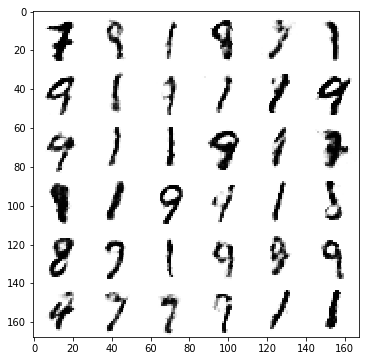

In [31]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

###Staring the Model training Session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, _ = df.train.next_batch(batch_size)
        
        # Generate noise to feed to the generator
        noise_temp = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
        
        # Run optimization op (backprop)
        feed_dict = {disc_input: batch_x, gen_inp: noise_temp}
        _, _, gl, dl = sess.run([training_gen, training_disc, cost_gen, cost_disc],
                            feed_dict=feed_dict)
        if step % 2000 == 0 or step == 1:
            print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (step, gl, dl))
    print("Finished!")
    
    
    # Testing
    # Generating the  images using the generator network
    n = 6
    canvas = np.empty((28 * n, 28 * n))

    for i in range(n):
      # Noise input.
        z = np.random.uniform(-1., 1., size=[n, noise_dim])
      # Generate image from noise.
        g = sess.run(gen_out, feed_dict={gen_inp: z})
      # Reverse colours for better display
        g = -1 * (g - 1)
        for j in range(n):
        # Draw the generated digits
            canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

    plt.figure(figsize=(n, n))
    plt.imshow(canvas, origin="upper", cmap="gray")
    plt.show()